# Overfitting on the IMDB movie reviews dataset

In this notebook we shall focus on overfitting, demonstrating the phenomenon and studying techniques to address it. The dataset we shall use is the IMDB movie reviews dataset, composed of 25,000 movies reviews, labeled by sentiment (positive/negative).

To prevent overfitting, the best solution is to use more training data. When that is not a
viable possibility, you can try to use regularization techniques, constraining the quantity and quality of information stored by the model. If a network can only afford to memorize a small number of patterns, the optimization process will force it to focus on the most prominent ones, which have a better chance of generalizing well.



In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import imdb
import matplotlib.pyplot as plt
import numpy as np

Let us load the dataset. In keras, the dataset is preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. 

In [2]:
num_words = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=num_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

Let us a look at the encoding of the first review.

In [3]:
print(x_train[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


This representation has a variable length dimension, that is not very stuitable for a neural network. 

Let us transform it into a multi_hot encoding of of dimension equal to num_words. In this representation, a word gets index 1 if it appears in the document. It is essentially a bag-of-words encoding.

In [4]:
def multi_hot_sequences(sequences, dimension): 
  multi_hot = np.zeros((len(sequences),dimension))
  for i in range(0,len(sequences)):
    multi_hot[i, sequences[i]] = 1
  return multi_hot

x_train = multi_hot_sequences(x_train, num_words)
x_test = multi_hot_sequences(x_test, num_words)

Let us have a look at the initial part of the encoding for the first review.

In [5]:
print(x_train[0,0:30])

[0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0.]


We now define our first model, that is just a concatenation of three dense layers.

In [14]:
seq = Input(shape=(num_words,))
x = Dense(64, activation='relu')(seq)
x = Dense(16, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

base_model = Model(seq, x)

In [ ]:
base_model.summary()

We compile the model using adam as optimizer, and binary crossentropy (log likelyhood) as loss function. The fit function returns a history of the training, that can be later inspected. In addition to the loss function, that is the canonical metric used for training, we also ask the model to keep trace of accuracy.

In [15]:
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
base_history = base_model.fit(
    x_train,
    y_train,
    epochs = 6,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 1
)

Epoch 1/6
49/49 [==============================] - 1s 11ms/step - loss: 0.6117 - accuracy: 0.6500 - val_loss: 0.4170 - val_accuracy: 0.8147
Epoch 2/6
49/49 [==============================] - 0s 8ms/step - loss: 0.3932 - accuracy: 0.8274 - val_loss: 0.3879 - val_accuracy: 0.8305
Epoch 3/6
49/49 [==============================] - 0s 7ms/step - loss: 0.3687 - accuracy: 0.8410 - val_loss: 0.3843 - val_accuracy: 0.8327
Epoch 4/6
49/49 [==============================] - 0s 7ms/step - loss: 0.3629 - accuracy: 0.8415 - val_loss: 0.3829 - val_accuracy: 0.8329
Epoch 5/6
49/49 [==============================] - 0s 7ms/step - loss: 0.3574 - accuracy: 0.8455 - val_loss: 0.3817 - val_accuracy: 0.8341
Epoch 6/6
49/49 [==============================] - 0s 8ms/step - loss: 0.3501 - accuracy: 0.8452 - val_loss: 0.3812 - val_accuracy: 0.8320


Let us see the keys available in our history.

In [11]:
print(base_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


The following function allows us to plot the results.

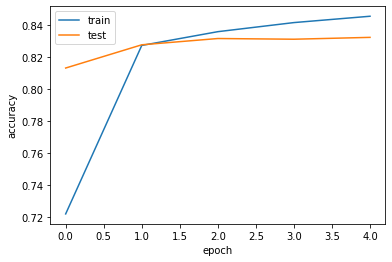

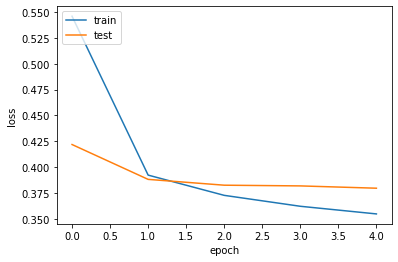

In [12]:
def plot_history(model_history,keys):
    m,val_m = keys
    plt.plot(model_history.history[m])
    plt.plot(model_history.history[val_m])
    plt.ylabel(m)
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plot_history(base_history,['accuracy','val_accuracy'])
plot_history(base_history,['loss','val_loss'])


# Weight regularization

Now we modify our base model adding regularizers. 

A common way to mitigate overfitting is to reduce the complexity of the network by forcing its weights to only take small values, making the distribution of weights more “regular”. This is called “weight regularization”, and it is done by adding to the loss function of the network an additional cost associated with having large weights. 

In [ ]:
from keras import regularizers

seq = Input(shape=(num_words,))
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(seq)
x = Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.005))(x)
x = Dense(1, activation='sigmoid')(x)

l2reg_model = Model(seq, x)

In [ ]:
l2reg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
l2reg_history = l2reg_model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 2
)

Epoch 1/5
49/49 - 1s - loss: 1.0703 - accuracy: 0.7058 - val_loss: 0.7848 - val_accuracy: 0.8078
Epoch 2/5
49/49 - 0s - loss: 0.6682 - accuracy: 0.8248 - val_loss: 0.5951 - val_accuracy: 0.8289
Epoch 3/5
49/49 - 0s - loss: 0.5542 - accuracy: 0.8331 - val_loss: 0.5310 - val_accuracy: 0.8313
Epoch 4/5
49/49 - 0s - loss: 0.5074 - accuracy: 0.8329 - val_loss: 0.4992 - val_accuracy: 0.8315
Epoch 5/5
49/49 - 0s - loss: 0.4827 - accuracy: 0.8334 - val_loss: 0.4778 - val_accuracy: 0.8319


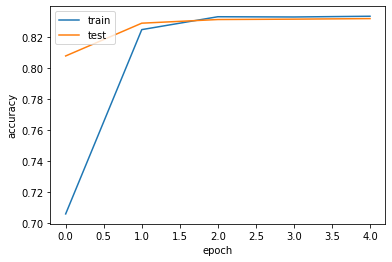

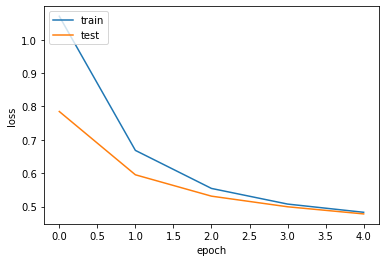

In [ ]:
plot_history(l2reg_history,['accuracy','val_accuracy'])
plot_history(l2reg_history,['loss','val_loss'])

# Dropout

Dropout is an alternativeregularization techniques for neural networks. It consists of randomly “dropping out” (i.e. set to zero) a number of output features of the layer during training. 

At test time, no units are dropped out, but the layer’s output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [ ]:
from keras.layers import Dropout
from keras import optimizers

Let’s add a couple of dropout layers in our IMDB network and see how it performs.


In [ ]:
seq = Input(shape=(num_words,))
x = Dense(64, activation='relu')(seq)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

dropout_model = Model(seq, x)

In [ ]:
dropout_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
dropout_model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 500)]             0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                32064     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 17        
Total params: 33,121
Trainable params: 33,121
Non-trainable params: 0
______________________________________________________

In [ ]:
dropout_history = dropout_model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 1
)

Epoch 1/5
49/49 [==============================] - 1s 10ms/step - loss: 0.7349 - accuracy: 0.5386 - val_loss: 0.6069 - val_accuracy: 0.7374
Epoch 2/5
49/49 [==============================] - 0s 6ms/step - loss: 0.6095 - accuracy: 0.6626 - val_loss: 0.4790 - val_accuracy: 0.7952
Epoch 3/5
49/49 [==============================] - 0s 6ms/step - loss: 0.5144 - accuracy: 0.7490 - val_loss: 0.4188 - val_accuracy: 0.8177
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 0.4651 - accuracy: 0.7895 - val_loss: 0.3937 - val_accuracy: 0.8252
Epoch 5/5
49/49 [==============================] - 0s 6ms/step - loss: 0.4329 - accuracy: 0.8106 - val_loss: 0.3847 - val_accuracy: 0.8292


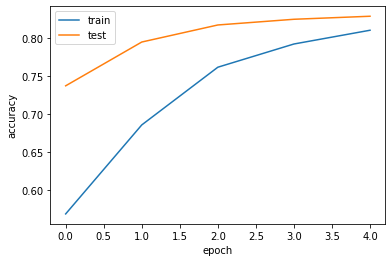

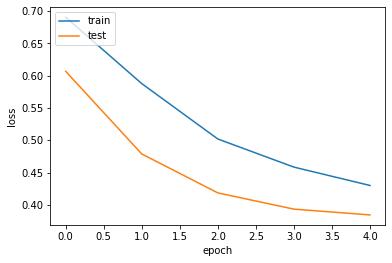

In [ ]:
plot_history(dropout_history,['accuracy','val_accuracy'])
plot_history(dropout_history,['loss','val_loss'])

In [ ]:
seq = Input(shape=(num_words,))
x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005))(seq)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.005))(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

mixed_model = Model(seq, x)

In [ ]:
adam = optimizers.Adam(lr=0.001)
mixed_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
mixed_history = mixed_model.fit(
    x_train,
    y_train,
    epochs = 5,
    batch_size = 512,
    validation_data = (x_test, y_test),
    verbose = 2
)

Epoch 1/5
49/49 - 1s - loss: 1.2140 - accuracy: 0.5646 - val_loss: 0.9815 - val_accuracy: 0.7381
Epoch 2/5
49/49 - 0s - loss: 0.8604 - accuracy: 0.7024 - val_loss: 0.6724 - val_accuracy: 0.8080
Epoch 3/5
49/49 - 0s - loss: 0.6633 - accuracy: 0.7860 - val_loss: 0.5592 - val_accuracy: 0.8250
Epoch 4/5
49/49 - 0s - loss: 0.5725 - accuracy: 0.8101 - val_loss: 0.5067 - val_accuracy: 0.8297
Epoch 5/5
49/49 - 0s - loss: 0.5265 - accuracy: 0.8191 - val_loss: 0.4807 - val_accuracy: 0.8298


# Early stopping

Early stopping is a method that allows you to stop training as soon as the model performance stops improving on the validation dataset.

This requires that a validation set must be provided to the fit() function. 

Early stopping can be simply implemented in keras using callbacks.
A callback is a function taht is called at specific stages of the training procedure: start/end of epochs, start end of minibatches, etc. 

You can use callbacks to get a view on internal states and statistics of the model during training. A list of callbacks can be passed to the .fit() function using the keyword argument "callbacks". 

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os 

saveDir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(saveDir):
    os.makedirs(saveDir)

#mixed_model.load_weights(saveDir + 'Cifar10_to256.hdf5')

es_cb = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')
chkpt = saveDir + 'Cifar10_to256.hdf5'

cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
mixed_model.fit(x_train, y_train,
                batch_size=512, #batch_size,
                epochs= 20,
                verbose=1,
                validation_data=(x_test,y_test),
                callbacks=[es_cb, cp_cb],
                shuffle=True)

Epoch 1/20
49/49 [==============================] - 0s 8ms/step - loss: 0.4999 - accuracy: 0.8259 - val_loss: 0.4692 - val_accuracy: 0.8293

Epoch 00001: val_loss improved from inf to 0.46923, saving model to /content/saved_modelsCifar10_to256.hdf5
Epoch 2/20
49/49 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.8274 - val_loss: 0.4554 - val_accuracy: 0.8308

Epoch 00002: val_loss improved from 0.46923 to 0.45541, saving model to /content/saved_modelsCifar10_to256.hdf5
Epoch 3/20
49/49 [==============================] - 0s 6ms/step - loss: 0.4729 - accuracy: 0.8287 - val_loss: 0.4549 - val_accuracy: 0.8281

Epoch 00003: val_loss improved from 0.45541 to 0.45486, saving model to /content/saved_modelsCifar10_to256.hdf5
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.4689 - accuracy: 0.8283 - val_loss: 0.4481 - val_accuracy: 0.8277

Epoch 00004: val_loss improved from 0.45486 to 0.44813, saving model to /content/saved_modelsCifar10_to2

In [ ]:
loss,acc = mixed_model.evaluate(x_test,y_test)
print("test loss = ", loss)
print("test accuracy = ", acc)

782/782 [==============================] - 1s 897us/step - loss: 0.4314 - accuracy: 0.8318
test loss =  0.43140414357185364
test accuracy =  0.8317999839782715
